In [151]:
import math
import os.path
import pandas as pd
import json
from random import shuffle
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import seaborn as sns
print (os.getcwd())

/Users/Kabbani/Desktop/Insper/Ciência dos Dados/P3-CD-AA-BK-GB-GK


Algumas restrições do dataset foram feitas pois alguns dados foram vistos como outliers que afetavam bastante a construção dos histogramas, e como foram poucos dados, eles foram descartados.

In [152]:
dados=pd.read_csv('AB_NYC_2019.csv')
dados=dados[dados.room_type=='Entire home/apt']
dados=dados.loc[(dados.minimum_nights<30)]
dados=dados.loc[(dados.calculated_host_listings_count<10)]
dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


## Análise Exploratória

### Latitude e longitude:

In [153]:
y=dados['price']
x=dados[['latitude','longitude']]

A análise de longitude e latitude pode prover uma análise geográfica do preço bastante informativa, uma vez que as áreas com preços maiores podem ser identificadas. A análise por bairro será feita ao decorrer do trabalho, mas essa análise complementa a do bairro, uma vez que ela pode ser até mais específica, evidenciando as regiões com maiores preços sem ser restringida pelas delimitações de um bairro específico. 

Para começar, é importante ver o histograma tanto da latitude, quanto da longitude, para ter uma noção sobre a concentração dos airbnbs na cidade de Nova Iorque.

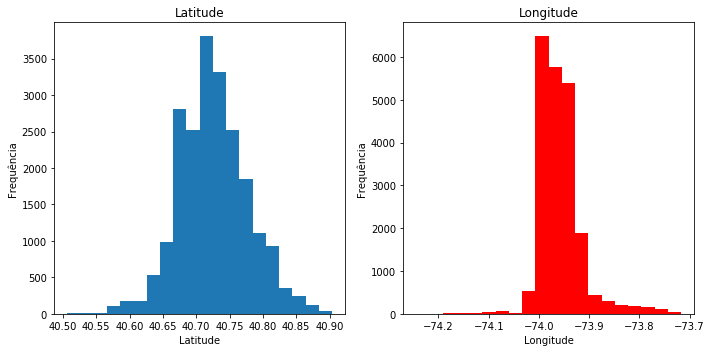

In [154]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plot=x['latitude'].plot.hist(bins=20)
plt.title('Latitude')
plt.ylabel('Frequência')
plt.xlabel('Latitude')

plt.subplot(122)
plot=x['longitude'].plot.hist(bins=20,color='r')
plt.title('Longitude')
plt.ylabel('Frequência')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

Os histogramas acima evidenciam que a quantidade de airbnbs é concentrada em torno das longitudes -74 e -73.9, enquanto as latitudes são um pouco mais diluídas, mas também concentradas entre a faixa de 40.65 e 40.80. Dito isso, é possível ver uma clara concentração dos apartamentos nas latitudes/longitudes centrais, algo que pode justificar uma elevação dos preços nessa região, não somente por uma potencial melhor qualidade ou localização, mas também pela suposição de que uma região com uma densidade de apartamentos muito maior terá uma quantidade de apartamentos mais caros maior do que em outras regiões, mesmo assumindo que a probabilidade de um apartamento ser caro seja a mesma para todas as regiões.

Abaixo, foi plotado um gráfico tridimensional que mostra um plano composto pela latitude e longitude (eixos x e y, respectivamente), e com o preço no eixo z, para que a relação entre latitude, longitude, e preço possa ser analisada. O gráfico deste arquivo, entretanto, mostra somente a visão por um ângulo, algo que pode prejudicar a análise. Para visualizar o gráfico de maneira interativa, o arquivo "gráfico_interativo.ipynb" deve estar disponível na mesma pasta que este.

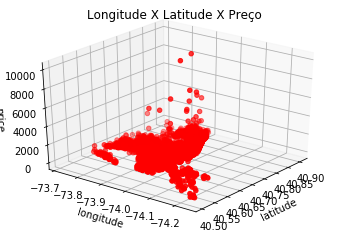

In [155]:
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['latitude'],x['longitude'],y,c='r',marker='o')
ax.view_init(30,-142)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('price')
ax.set_title('Longitude X Latitude X Preço')
plt.show()

Ao analisar o gráfico acima, especialmente através de sua visualização interativa, pode-se evidenciar claramente que há uma concentração de apartamentos com um preço mais alto, em torno do centro do gráfico, nas latitudes 40.6->40.8, e nas longitudes -74->-73.9. Dessa forma, é possível visualisar um aumento nos preços na região central da cidade, algo que pode ser fruto da maior quantidade de apartamentos na região (como foi explicado pela suposição previamente mencionada), de variáveis como localização e qualidade serem de fato mais apelativas e portanto aumentam o preço, ou uma combinação dos dois fatores.

Para visualizar separadamente a relação entre longitude, latitude, e preço, foram plotados os gráficos de maneira bi-dimensional abaixo, a fim de analisar latitude e longitude separadamente.

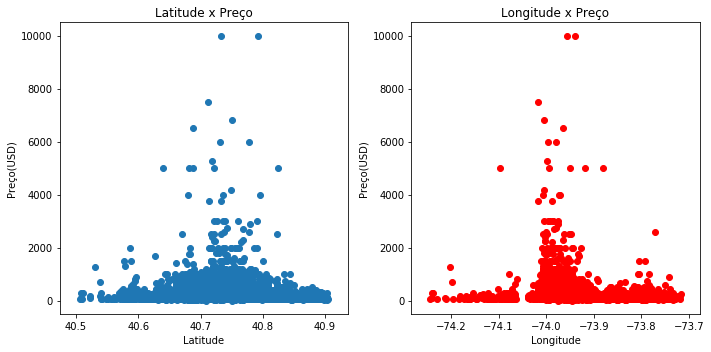

In [156]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(x['latitude'],y)
plt.title('Latitude x Preço')
plt.ylabel('Preço(USD)')
plt.xlabel('Latitude')

plt.subplot(122)
plt.scatter(x['longitude'],y,color='r')
plt.title('Longitude x Preço')
plt.ylabel('Preço(USD)')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

Como pode ser evidenciado nos gráficos acima, as concentrações de preço préviamente mencionadas de fato ocorrem na região central, especialmente quando considerando a longitude, uma vez que seus dados aparentam estar concentrados de maneira mais forte em torno da longitude -74, enquanto a concentração na latitude é um pouco mais dispersa (tendo alguns valores mais caros começando nas latitudes mais extremas, não só no centro), apesar de ainda existente.

Para compreender ainda mais a fundo a concentração dos apartamentos mais caros, abaixo podem ser visualisados histogramas que contém apenas os apartamentos cujos preços são acima da média.

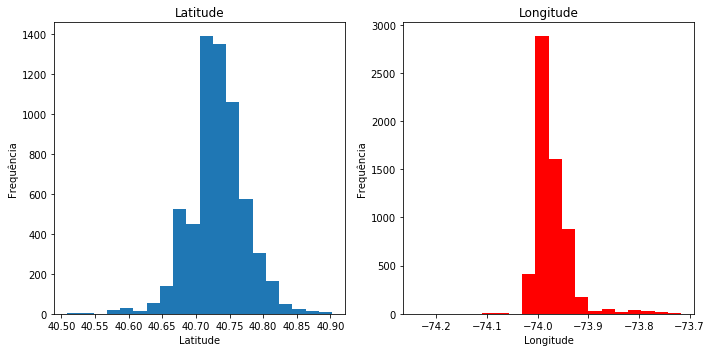

In [157]:
media_price=dados.price.mean()
data=dados[dados.price>media_price]
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plot=data['latitude'].plot.hist(bins=20)
plt.title('Latitude')
plt.ylabel('Frequência')
plt.xlabel('Latitude')

plt.subplot(122)
plot=data['longitude'].plot.hist(bins=20,color='r')
plt.title('Longitude')
plt.ylabel('Frequência')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

Nos histogramas acima, são evidenciadas as mesmas tendências de concentração vistas nos scatterplots analisados previamente. Isso significa, que a quantidade de apartamentos acima da faixa média de preços está de fato concentrada em torno da latitude 40.7->40.8 e da longitude -74->-73.9. Pouco mais de 3500 (de um total de 7350) apartamentos estão listados entre latitudes 40.7 e 40.75, e quase todos estão entre as longitudes -74.05 e -73.9. Dessa forma, pode-se dizer que as coordenadas de um apartamento podem ter um impacto em seu preço, vistas as concentrações demonstradas na análise.

Portanto, esses atributos são importantes para poder predizer o preço de um apartamento, e assim devem ser incorporados em um modelo preditivo.

### Quantidade de reviews por mês:

A quantidade de reviews por mês que um apartamento tem, pode dar a idéia de confiança ao consumidor e assim aumentar a demanda e portanto o preço de um apartamento no longo prazo. Para ver se essa hipótese se aplica ao database em questão, é importante verificar tanto a distribuição da quantidade de reviews por mês quanto sua relação com o preço de um apartamento.

Abaixo, está o histograma que mostra a distribuição da quantidade de reviews por mês.

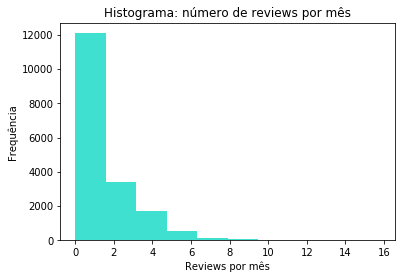

In [158]:
dados.reviews_per_month.plot.hist(bins=10,color='turquoise')
plt.ylabel('Frequência')
plt.xlabel('Reviews por mês')
plt.title('Histograma: número de reviews por mês')
plt.show()

Como pode ser evidenciado no histograma acima, a vasta maioria dos apartamentos tem menos de seis reviews por mês, sendo que grande parte está concentrada entre 0-2. Isso é de ser esperado, pois muitas vezes os apartamentos não são alugados múltiplas vezes por mês, fazendo com que estes valores sejam de fato baixos. Entretanto, como nas variáveis latitude/longitude, vale mencionar que devido à grande concentração em torno dos valores mais baixos, pode ser que hajam mais apartamentos caros nesses valores simplesmente por haverem mais apartamentos no geral.

Abaixo, está o scatterplot que mostra a relação entre a variável em questão e o preço dos apartamentos.

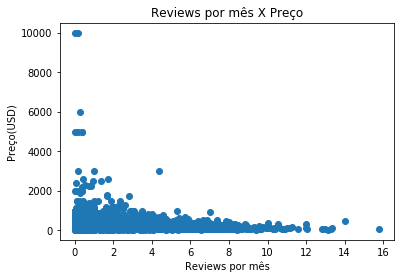

In [159]:
plt.scatter(dados['reviews_per_month'],dados['price'])
plt.xlabel('Reviews por mês')
plt.ylabel('Preço(USD)')
plt.title('Reviews por mês X Preço')
plt.show()

No gráfico acima, pode se notar que os preços mais baixos estão distribuídos de maneira uniforme, enquanto os valores mais altos estão mais concentrados nos apartamentos com poucos reviews. Como mencionado acima, isso pode ser mera casualidade, devido à maior presença de apartamentos nessa faixa de reviews (como mostra o histograma). Para ter uma noção diferente do gráfico, a fim de notar se de fato existe uma certa relação entre os dados ou não, o mesmo scatterplot foi plotado abaixo em escala logarítmica.

/Users/Kabbani/anacondanew3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


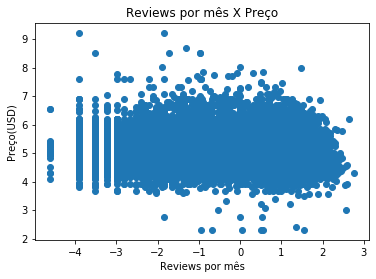

In [160]:
plt.scatter(np.log(dados['reviews_per_month'], dtype='float64'),np.log(dados['price'], dtype='float64'))
plt.xlabel('Reviews por mês')
plt.ylabel('Preço(USD)')
plt.title('Reviews por mês X Preço')
plt.show()

Como pode ser evidenciado acima, o atributo 'reviews por mês' não tem quase nenhuma relação com o preço de um airbnb. Portanto, é altamente provável que a hipótese de que os preços mais altos se concentrando nos valores menores seja uma mera consequência do fato de que existe uma concentração muito maior de apartamentos nesses valores.

Dessa forma, o atributo em questão não se mostra muito importante para a predição do preço de um apartamento, uma vez que sua relação com o preço é extremamente precária.

### Burgos de Nova Iorque:

In [161]:
dados = dados.loc[((dados.price > 10) & (dados.price < 1000))]

In [162]:
manhattan = dados.loc[(dados.neighbourhood_group == 'Manhattan')]
brooklyn = dados.loc[(dados.neighbourhood_group == 'Brooklyn')]
queens = dados.loc[(dados.neighbourhood_group == 'Queens')]
bronx = dados.loc[(dados.neighbourhood_group == 'Bronx')]
statenisland = dados.loc[(dados.neighbourhood_group == 'Staten Island')]

In [163]:
manhattan['price'].describe()

count    10122.000000
mean       222.128236
std        132.334552
min         11.000000
25%        140.000000
50%        190.000000
75%        250.000000
max        999.000000
Name: price, dtype: float64

In [164]:
brooklyn['price'].describe()

count    8835.000000
mean      168.620260
std       102.913529
min        11.000000
25%       105.000000
50%       145.000000
75%       199.000000
max       999.000000
Name: price, dtype: float64

In [165]:
statenisland['price'].describe()

count    163.000000
mean     135.871166
std      105.631326
min       48.000000
25%       75.000000
50%      100.000000
75%      150.000000
max      800.000000
Name: price, dtype: float64

In [166]:
queens['price'].describe()

count    1980.000000
mean      142.102020
std        81.096999
min        15.000000
25%        92.000000
50%       120.000000
75%       169.000000
max       900.000000
Name: price, dtype: float64

In [167]:
bronx['price'].describe()

count    350.000000
mean     124.702857
std       83.269423
min       28.000000
25%       80.000000
50%      100.000000
75%      140.000000
max      670.000000
Name: price, dtype: float64

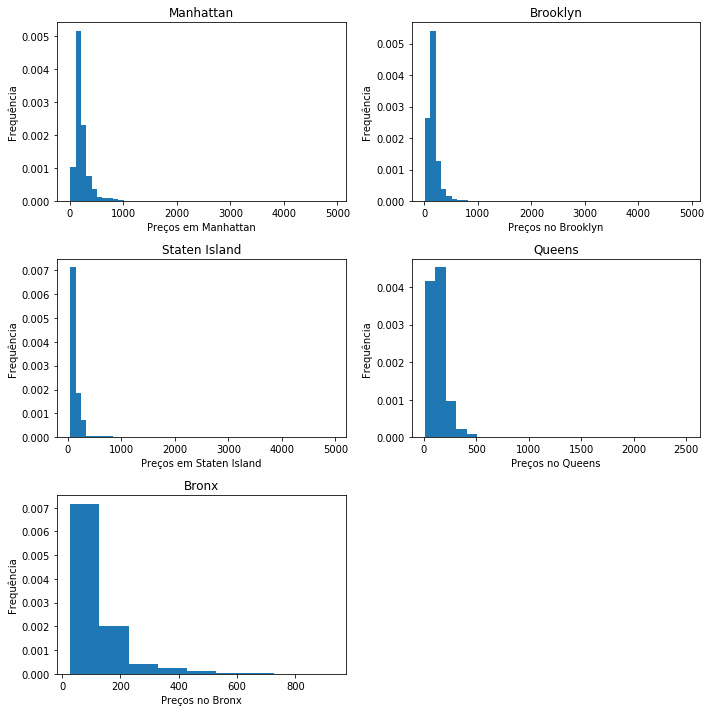

In [168]:
fig = plt.figure(figsize=(10, 10))

faixaman = range(10,5000,100)
faixabrook = range(10,5000,100)
faixastaten = range(48,5000,100)
faixabronx = range(28,1000,100)
faixaqueens = range(10,2600,100)

plt.subplot(321)
plot=manhattan['price'].plot.hist(bins=faixaman,density=True)
plt.title('Manhattan')
plt.ylabel('Frequência')
plt.xlabel('Preços em Manhattan')


plt.subplot(322)
plot=brooklyn['price'].plot.hist(bins=faixabrook,density=True)
plt.title('Brooklyn')
plt.ylabel('Frequência')
plt.xlabel('Preços no Brooklyn')


plt.subplot(323)
plot=statenisland['price'].plot.hist(bins=faixastaten,density=True)
plt.title('Staten Island')
plt.ylabel('Frequência')
plt.xlabel('Preços em Staten Island')


plt.subplot(324)
plot=queens['price'].plot.hist(bins=faixaqueens,density=True)
plt.title('Queens')
plt.ylabel('Frequência')
plt.xlabel('Preços no Queens')


plt.subplot(325)
plot=bronx['price'].plot.hist(bins=faixabronx,density=True)
plt.title('Bronx')
plt.ylabel('Frequência')
plt.xlabel('Preços no Bronx')
plt.tight_layout()
plt.show()

In [169]:
man = manhattan['price'].mean()
brook =  brooklyn['price'].mean()
queenao =  queens['price'].mean()
bronxobas =  bronx['price'].mean()
staten = statenisland['price'].mean()
print('O preço médio de um Airbnb em Manhattan é: U$D', manhattan['price'].mean())
print('O preço médio de um Airbnb em Brooklyn é: U$D', brooklyn['price'].mean())
print('O preço médio de um Airbnb em Staten Island é: ', statenisland['price'].mean())
print('O preço médio de um Airbnb no Queens é: U$D', queens['price'].mean())
print('O preço médio de um Airbnb no Bronx é: U$D', bronx['price'].mean())

man_std = manhattan['price'].std()
brook_std =  brooklyn['price'].std()
queenao_std =  queens['price'].std()
bronxobas_std =  bronx['price'].std()
staten_std = statenisland['price'].std()

O preço médio de um Airbnb em Manhattan é: U$D 222.12823552657576
O preço médio de um Airbnb em Brooklyn é: U$D 168.62026032823997
O preço médio de um Airbnb em Staten Island é:  135.87116564417178
O preço médio de um Airbnb no Queens é: U$D 142.1020202020202
O preço médio de um Airbnb no Bronx é: U$D 124.70285714285714


Text(0, 0.5, 'Valor em U$D')

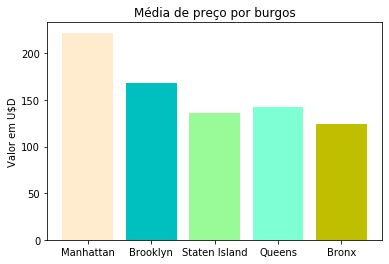

In [170]:
mean_burgos = {'Manhattan': man , 'Brooklyn': brook ,'Staten Island': staten, 'Queens': queenao, 'Bronx': bronxobas}
names=list(mean_burgos.keys())
values=list(mean_burgos.values())
plt.bar(names,values, color = ('blanchedalmond','c','palegreen','aquamarine','y'))
plt.title("Média de preço por burgos")
plt.ylabel('Valor em U$D')

In [171]:
#Inserir gráfico com margem de erro, colocar min e max de cada e escrever um textinho peq explicando.
burgos = ['Manhattan','Brooklyn','Staten Island','Queens','Bronx']
x_pos = np.arange(len(burgos))
medias_burgos = [man,brook,staten,queenao,bronxobas]
variacao = [man_std,brook_std,staten_std,queenao_std,bronxobas_std]

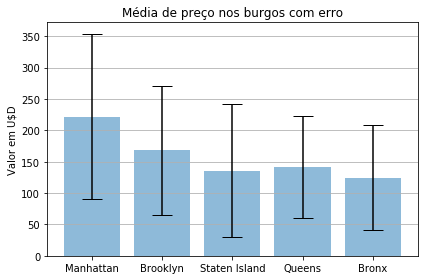

In [172]:
#Gráfico mostra a variação dos preços (quando formos fazer o proj final seria interessante comecar cm esses graficos e 
#depois ir mostrando como agnt 'ajusta' essa variacao)
fig, ax = plt.subplots()
ax.bar(x_pos, medias_burgos, yerr=variacao, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Valor em U$D')
ax.set_xticks(x_pos)
ax.set_xticklabels(burgos)
ax.set_title('Média de preço nos burgos com erro')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

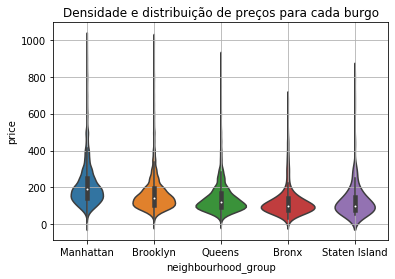

In [173]:
densida_e_distr=sns.violinplot(data=dados, x='neighbourhood_group', y='price')
densida_e_distr.set_title('Densidade e distribuição de preços para cada burgo')
densida_e_distr.grid(True)

A variável tratada acima mostra a diferença no comportamento da variável preço de acordo com a região (burgo) em que ela é analisada. A análise começa por plotando histogramas de cada região que nos permite analisar como estão distribuídos os preços de acordo com a frequência na qual estes aparecem. A primeira "simplificação"/"iteração" feita para deixar este gráfico algo mais pertinente ao trabalho, foi estabelecer um valor máximo ao valor do apartamento em qualquer região. Por que isso? Quase em todas as regiões, o apartamento com o valor mais caro era em torno dos 2000 dólares e em certas ocasiões, este valor chegava aos 10.000 dólares. Dado isso, optamos por simplificar e considerar o valor máximo de custo do apartamento, 1000 dólares, assim era feita uma análise mais pertinente, com valores mais próximos uns dos outros ao invés de poucos distantes que poderiam afetar a média de maneira não muito"justa", já que estes apartamentos são absurdamente caros.

Seguindo a análise, foi feito um segundo gráfico. Neste, analisamos a diferença na média de preço nos 5 burgos e como, obviamente, Manhattan é o com a maior média (aptos mais cara\os) e o Bronx, a com a menor média (aptos mais baratos). Mas a análise não parou por aí. Após analisar isto, surgiu uma dúvida a nós. Com o conhecimento que temos de Nova Iorque, foi feita uma análise para descobrir qual era o grau de erro presente nesse gráfico. O grau de erro, neste caso, era interprestado como a variação de preço nos diferentes burgos, eis que chegamos à conclusão que em Manhattan há uma variação maior no preço do que em qualuqer outro burgo. Isso acontece por dois motivos. O primeiro é que nossa amostra tem uma quantidade muito maior de  apartamentos em Manhattan, o que causa estes sterem uma maior variação entre eles, e o segundo é que os apartamentos em  lugares como o Bronx, tendem a ser mais padrão, não variando tanto de um para outro.

O último gráfico, feito com o seaborn, somente evidencia e mostra como os apartamentos de Manhattan (mesmo que mais caros) demonstram estarem mais espalhados no preço do que os outros burgos. 

### Disponibilidade:

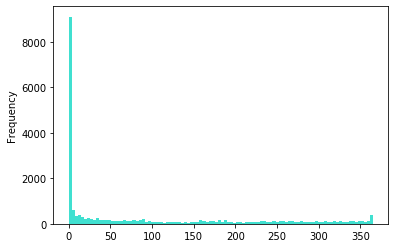

In [174]:
dados.availability_365.plot.hist(bins=100,color='turquoise')

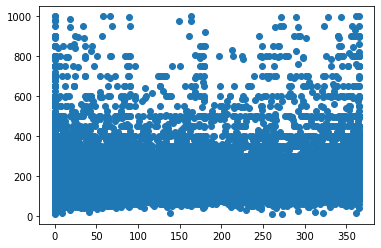

In [175]:
plt.scatter(dados.availability_365,dados.price)

A variável a ser analisada nesta seção é a chamada 'availability 365', que representa a quantidade de dias, no último ano, que o apartamento esteve disponível para aluguel. Como se trata de uma variável quantitativa, e trata o tópico de disponibilidade de aluguel de apartamentos, ela não oferece muita discussão se ele é analisada separadamente de todo resto, ou  seja, sozinha.

Por isso, tentamos compara-la à uma variável que  está bastante presente em nosso trabalho e esta é o preço dos apartwamentos em dólares americanos. Como pode-se observar acima, os valores em dólar  e a disponibilidade não fornecem qualquer tipo de correlação para a análise quantitativa do trabalho. Se nos aprofundarmos  no entendimento do trabalho, esta variável pode vir a ser  útil mais tarde, mas neste estágio de análise exploratória,  já provou ser uma variável que não terá muita importância no começo.

### Minimum nights:

A quantidade noites minimas de um apartamento, mostra  o perfil do dono do apartamento, e o que ele espera para o seu apartamento, quantas noites são necessárias no minímo para uma pessoa poder alugar o apartamento. Para ver se essa variavel é impactante no database,  se aplica ao database em questão, é importante verificar tanto a quantidade minima de noites quanto sua relação com o valor de um apartamento.

Na próxima celula está o histograma que mostra a distribuição da quantidade de noites minimas.

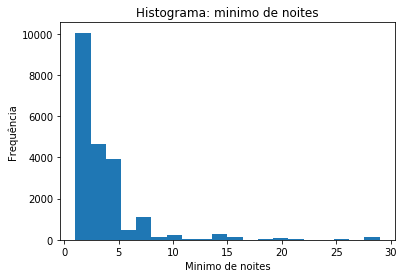

In [176]:
dados.minimum_nights.plot.hist(bins=20)
plt.ylabel('Frequência')
plt.xlabel('Minimo de noites')
plt.title('Histograma: minimo de noites')
plt.show()

Como o histograma esta apresentando,a maioria dos dados estão concentrados entre 1 e 5, porém alguns apartamentos tem numeros maiores de noites minimas. Esses dados podem ser justificados pelo fato de muitos donos não quererem alugar seus apartamentos somente por 1 noite, porém não deixam o minimo de noites muito alto pois pouquíssimas pessoas alugam por muitos dias.

Na celula abaixo esta um grafico de disperção que relaciona o numero minimo de noites com o preço dos apartamentos.

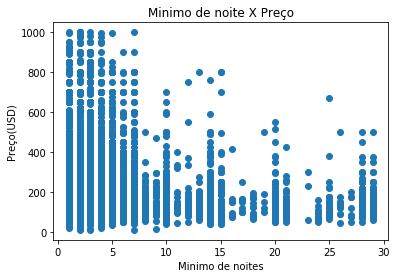

In [177]:
plt.scatter(dados['minimum_nights'],dados['price'])
plt.xlabel('Minimo de noites')
plt.ylabel('Preço(USD)')
plt.title('Minimo de noite X Preço')
plt.show()

No grafico acima, um padrão que pode ser pecebido, é que os precos por volta de $1000.00 estão bem distribuidos, porém o resto esta bem disperso. Então, este grafico esta plotado na celula abaixo com uma escala logarítmica.

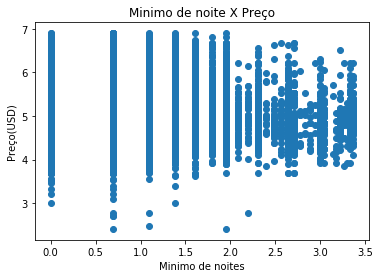

In [178]:
plt.scatter(np.log(dados['minimum_nights'], dtype='float64'),np.log(dados['price'],dtype='float64'))
plt.xlabel('Minimo de noites')
plt.ylabel('Preço(USD)')
plt.title('Minimo de noite X Preço')
plt.show()

Como pode ser visto no grafico acima, os dados estão bem dispersos e uma relação do numero minimo de noites e o preço do airbnb é fraquíssima. Pode se ver que os dados estão ce concentrando pro meio, porém ainda assim os dados continuam bem complexos.

Portanto, o numero minimo de noites não é uma variável que tem muito impacto no preço dos apartamentos.

### Calculated host listing count:

Essa nova variável "calculated host listing count" é o número real das listagens de hosts (donos dos apartamentos), isso seria um outro método para medir a experiência do dono do apartamento. Muitas pessoas que vão procurar um airbnb utliziam esse fator para escolher algum, e novamente, essa variável sera comparada com o preço dos apartamentos, para ver se ela interfere no valor deles.

Desta forma, um histograma desta variável esta apresentada abaixo:

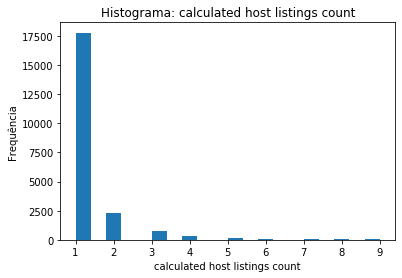

In [179]:
dados.calculated_host_listings_count.plot.hist(bins=20)
plt.ylabel('Frequência')
plt.xlabel('calculated host listings count')
plt.title('Histograma: calculated host listings count')
plt.show()

Como pode ser visto, a maioria dos dados neste histograma estão concentradas perto do numero 1, que tem uma grande frequencia de valores. A partir do numero 5 os dados estão com pequenas frequencias. Tal fato mostra que a variavel esta bem concentrada nos valores baixos, desta forma, os donos do apartamento com baixa frequencia tem uma baixa aparencia no histograma.

Da mesma forma que as outras variaveis foram analisadas, abaixo esta um grafico de dispersão que relaciona o valor dos airbnb's e o valor desta varável. 

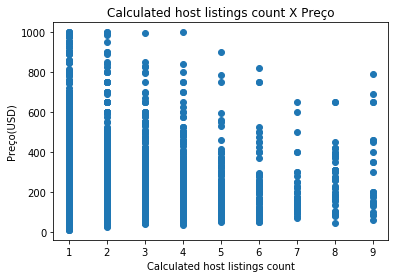

In [180]:
plt.scatter(dados['calculated_host_listings_count'],dados['price'])
plt.xlabel('Calculated host listings count')
plt.ylabel('Preço(USD)')
plt.title('Calculated host listings count X Preço')
plt.show()

Como novamente o grafico ficou bem  concentrado com os valores até $2000.00, o grafico da celula abaixo esta representado na celula abaixo em função logaritmica.

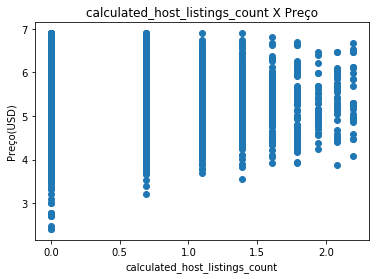

In [181]:
plt.scatter(np.log(dados['calculated_host_listings_count'], dtype='float64'),np.log(dados['price'],dtype='float64'))
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Preço(USD)')
plt.title('calculated_host_listings_count X Preço')
plt.show()

Como foi evidenciado acima, o grafico não tem uma relação aparente, os dados estão muito bem distribuidos. Portanto, o valor dos apartamentos não esta relacionado com o o numero de listagens do dono do apartamento.Desta forma, a variável não é muito impactante no valor dos apartamentos, e as outras variaveis em questão podem ter uma influencia maior no valor dos apartamento.

### Last review:

A variável de "last review" representa a ultima avaliação que o apartamento teve. Na celula abaixo os valores vão ser passados para datas, e depois para numero de dias, para uma analise poder ser feita.

In [182]:
dados.last_review=pd.to_datetime(dados.last_review)
pd.to_timedelta(dados.last_review).head()

/Users/Kabbani/anacondanew3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  


1   18037 days
3   18082 days
4   17854 days
5   18069 days
9   18056 days
Name: last_review, dtype: timedelta64[ns]

No final decidimos não utilizar essa variavel pois varios dados estão sem a data, então não teriamos um dataset completo. Desta forma, acreditamos que tirando essa variavel da analise estamos deixando a pesquisa menos imparcial, já que os varios dados não vão ser excluidos.

### Number of reviews


In [183]:
n= dados["number_of_reviews"]
n.describe()

count    21450.000000
mean        25.528858
std         44.620163
min          0.000000
25%          1.000000
50%          7.000000
75%         28.000000
max        488.000000
Name: number_of_reviews, dtype: float64

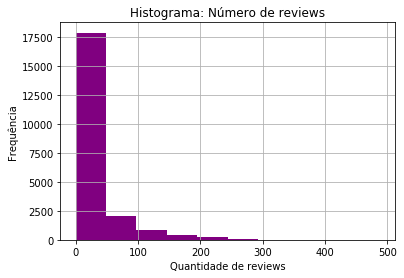

In [184]:
dados.number_of_reviews.hist(bins=10,color='purple')
plt.ylabel('Frequência')
plt.xlabel('Quantidade de reviews')
plt.title('Histograma: Número de reviews')
plt.show()

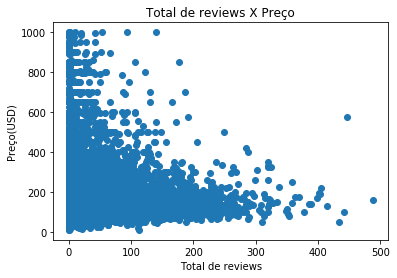

In [185]:
plt.scatter(dados['number_of_reviews'],dados['price'])
plt.xlabel('Total de reviews')
plt.ylabel('Preço(USD)')
plt.title('Total de reviews X Preço')
plt.show()

/Users/Kabbani/anacondanew3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


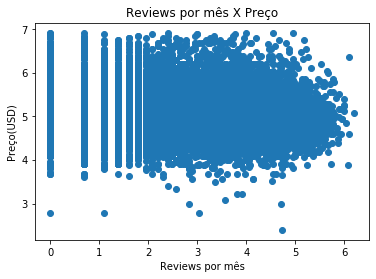

In [186]:
plt.scatter(np.log(dados['number_of_reviews'], dtype='float64'),np.log(dados['price'], dtype='float64'))
plt.xlabel('Reviews por mês')
plt.ylabel('Preço(USD)')
plt.title('Reviews por mês X Preço')
plt.show()

Para ver se o numero de reviews que um Airbnb tem é uma variavel relevante fizemos um gráfico que fizemos um gráfico com o total de reviews pelo preço, percebemos que podia ter uma certa relevancia mas ao plotar um gráfico com log percebemos que não há relevância nenhuma e que não será uma variável relevante para uma futura análise.


### Neighborhood

In [187]:

w= dados.neighbourhood.value_counts()
w.head(9)

Williamsburg          1752
Bedford-Stuyvesant    1490
East Village          1054
Upper East Side        978
Harlem                 942
Upper West Side        942
Hell's Kitchen         873
Crown Heights          713
Chelsea                646
Name: neighbourhood, dtype: int64

In [188]:
len(dados.neighbourhood.value_counts())

214

In [189]:
Williamsburg = dados.loc[(dados.neighbourhood == 'Williamsburg')]
Bedford = dados.loc[(dados.neighbourhood == 'Bedford-Stuyvesant')]
Upper_East_Side = dados.loc[(dados.neighbourhood == 'Upper East Side')]
Upper_West_Side = dados.loc[(dados.neighbourhood == 'Upper West Side')]
Hells_Kitchen = dados.loc[(dados.neighbourhood == "Hell's Kitchen")]
East_Village = dados.loc[(dados.neighbourhood == 'East Village')]
Midtown = dados.loc[(dados.neighbourhood == 'Midtown')]
Harlem = dados.loc[(dados.neighbourhood == 'Harlem')]
Chelsea = dados.loc[(dados.neighbourhood == 'Chelsea')]

In [190]:
wil = Williamsburg['price'].mean()
bed = Bedford['price'].mean()
ues= Upper_East_Side['price'].mean()
uws = Upper_West_Side['price'].mean()
hells = Hells_Kitchen['price'].mean()
eastvill = East_Village['price'].mean()
mid = Midtown['price'].mean()
harl = Harlem['price'].mean()
chel = Chelsea['price'].mean()

print('O preço médio de um Airbnb em Williamsburg é: {0}'.format(wil))
print('O preço médio de um Airbnb em Bedford é: {0}'.format(bed))
print('O preço médio de um Airbnb em Upper East Side é: {0}'.format(ues))
print('O preço médio de um Airbnb em Upper West Side é: {0}'.format(uws))
print("O preço médio de um Airbnb em Hell's Kitchen é: {0}".format(hells))
print('O preço médio de um Airbnb em East Village é: {0}'.format(eastvill))
print('O preço médio de um Airbnb em Midtown é: {0}'.format(mid))
print('O preço médio de um Airbnb em Harlem é: {0}'.format(harl))
print('O preço médio de um Airbnb em Chelsea é: {0}'.format(chel))

wil_std = Williamsburg['price'].std()
bed_std = Bedford['price'].std()
ues_std= Upper_East_Side['price'].std()
uws_std = Upper_West_Side['price'].std()
hells_std = Hells_Kitchen['price'].std()
eastvill_std = East_Village['price'].std()
mid_std = Midtown['price'].std()
harl_std = Harlem['price'].std()
chel_std = Chelsea['price'].std()

O preço médio de um Airbnb em Williamsburg é: 200.42180365296804
O preço médio de um Airbnb em Bedford é: 147.848322147651
O preço médio de um Airbnb em Upper East Side é: 199.00715746421267
O preço médio de um Airbnb em Upper West Side é: 216.85138004246284
O preço médio de um Airbnb em Hell's Kitchen é: 246.09049255441008
O preço médio de um Airbnb em East Village é: 212.18406072106262
O preço médio de um Airbnb em Midtown é: 270.7265625
O preço médio de um Airbnb em Harlem é: 169.52972399150744
O preço médio de um Airbnb em Chelsea é: 257.3111455108359


Text(0, 0.5, 'Valor em U$D')

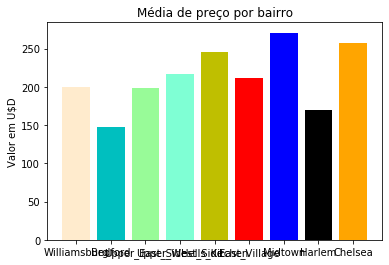

In [191]:
mean_neighborhood = {'Williamsburg': wil , 'Bedford': bed , 'Upper_East_Side': ues, 'Upper_West_Side': uws, 'Hells_Kitchen': hells, 'East_Village': eastvill, 'Midtown':mid, 'Harlem':harl, 'Chelsea':chel}
Names=list(mean_neighborhood.keys())
Values=list(mean_neighborhood.values())
plt.bar(Names,Values, color = ('blanchedalmond','c','palegreen','aquamarine','y','r','b','black','orange'))
plt.title("Média de preço por bairro")
plt.ylabel('Valor em U$D')
#aumentar tamanho do grafico para facilitar na leitura

Para fazer a análise dos bairros (neighbourhood) como eram muitos ia ficar muito dificil a visualisação do grafico, para resolver esse problema foram selecionadas os nove bairros que possuiam mais Airbnbs, para isso foi feito o preço médio de um Airbnb em cada região, criamos um gráfico de barras da média de preço por bairro, com esse gráfico podemos perceber que dependendo do bairro o valor do aluguel pode ser mais caro ou mais barato, um dos motivos que isso pode ter ocorrido é que cada bairro tem suas rspectivas características. Um bairro em que há uma concentração maior de pessoas pode ter um preço maior.